<a href="https://colab.research.google.com/github/LucasAntonello94/Lucas/blob/main/ProyectoDS_ParteIII_%2BAntonello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/CoderHouseDataScience/Proyecto/Proyecto_ParteIII_+Antonello/'

/content/gdrive/MyDrive/CoderHouseDataScience/Proyecto/Proyecto_ParteIII_+Antonello


El obetivo de este este analisis de datos es intentar comprender patrones en la ventas de videojuegos a escala mundial. Buscamos identificar factores que influyan en la ventas de los juegos en distintas regiones y proporcionar recomendaciones basadas en insights extraidos de los datos.

**Contexto comercial:** Con los años la industria de videojuegos ha crecido para quedar como la indutria de entretenimiento por excelencia acaparando a la del cine y la musica juntas, por eso cada vez mas empresas quieren meterse en el mundo de la creacion de videojuegos y para poder ayudarlos a ver que opciones pueden elegir para crear un juego que cumpla con lo que el mercado y los criticos buscan.

Se nos da la tarea de proporcionar visualizaciones que respondan preguntas especificas que nos guien a la hora de hacer un juego.

**Contexto analitico:** Se nos proporciona un Dataset (archivo csv) que contiene detalles de cada juego como, nombre, año de salida, genero, ventas en EEUU, ventas en EU, ventas en JP, ventas globales, calificacion de la critica, calificacion de los usuarios, desarolladora y la calificacion de edades.

  1. Leer, transformar y preparar los datos para visualizarlos.
  2. Realizar analisis y construir visualizaciones de los datos para identificar patrones.

Algunas preguntas a responder:
  1. Que genero vende mas en cada region
  2. Que genero vende mas a escala global
  3. ¿Hay alguna correlacion entre las ventas de un juego y la calificacion de
   criticos?
  4. ¿El rating afecta a las ventas?


## Obtengo los datos con los que trabajar

In [ ]:
# Muestro los primeros 10 para verificar que se haya cargado correctamente:
df = pd.read_csv("video_games_sales.csv", sep = ',')


## Overview de los datos

Analizemos las columnas presentes en los datos:

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


Tenemos las siguientes columnas


1. **Name**: Nombre del juego
2. **Year_of_Release**: Año en el que el juego salio a la venta.
3. **Genre**: Genero al que el juego pertence.
4. **Publisher**: Emprese que se encarga de publicar el juego.
5. **NA_Sales**: Ventas en Estados Unidos (NA)
6. **EU_Sales**: Ventas en Europa (EU)
7. **JP_Sales**: Ventas en Japon (JP)
8. **Other_Sales**: Ventas en otros sitios sin clasificar
9. **Global_Sales**: Ventas a escala mundial
10. **Critic_Score**: Critica de la prensa especializada
11. **Critic_Count**: Numero de criticas hechas por la prensa especializada
12. **User_Score**: Criticas de los usuarios
13. **User_Count**: Numero de criticas de usuarios
14. **Developer**: Empresa encargada de desarrollar el juego
15. **Raiting**: Calificacion por edades




## 1. Que genero vende mas en cada region:

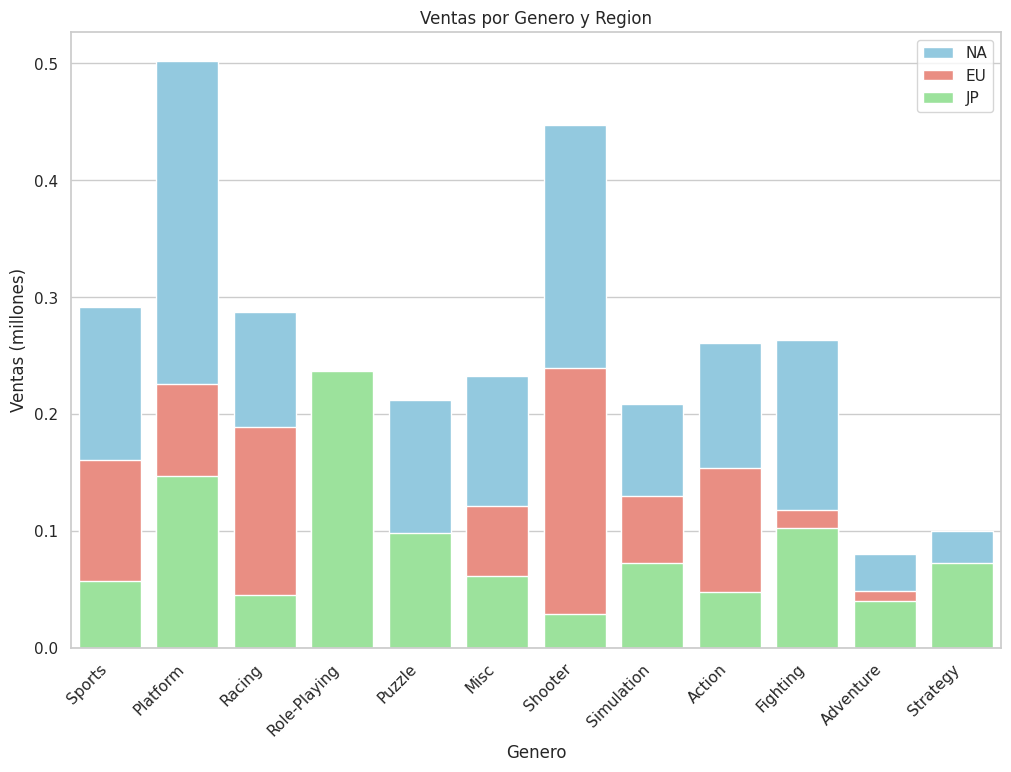

In [ ]:
#sns.set(style = "whitegrid")

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")

sns.barplot(x='Genre', y='NA_Sales', data=df, errorbar=None, color='skyblue', label='NA')
sns.barplot(x='Genre', y='EU_Sales', data=df, errorbar=None, color='salmon', label='EU')
sns.barplot(x='Genre', y='JP_Sales', data=df, errorbar=None, color='lightgreen', label='JP')

plt.xlabel("Genero")
plt.ylabel("Ventas (millones)")
plt.title("Ventas por Genero y Region")
plt.legend()

plt.xticks(rotation = 45, ha= "right")

plt.show()

El grafico de barras que trazamos muestra que en NA el genero que mas se vende es el de plataformas, en EU el Shooter y en JP el Role-Playing. Se recomienda para vender un jeugo en Europa se haga del genero Shooter, para America del norte Plataforma y para Japon RPG.


## 2. Que genero vende mas globalmente


In [ ]:
# Agrupo los datos por genero y sumo las ventas globales para cada uno:
datos_genero_ventas = df.groupby("Genre")["Global_Sales"].sum().reset_index().sort_values(by = "Global_Sales", ascending = False)

print(datos_genero_ventas)

           Genre  Global_Sales
0         Action       1745.27
10        Sports       1332.00
8        Shooter       1052.94
7   Role-Playing        934.40
4       Platform        828.08
3           Misc        803.18
6         Racing        728.90
2       Fighting        447.48
9     Simulation        390.42
5         Puzzle        243.02
1      Adventure        237.69
11      Strategy        174.50


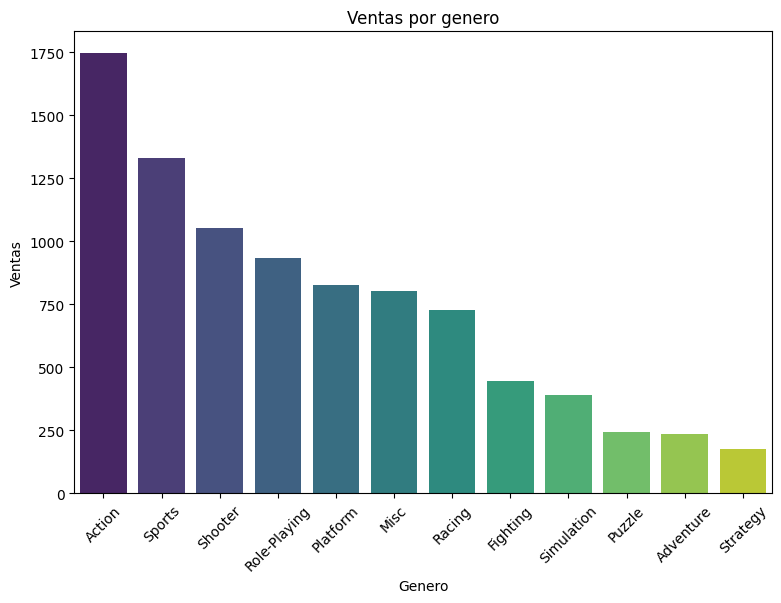

In [ ]:


# Creo un agrafica de barras comparando los datos:
plt.figure(figsize = (9, 6))

sns.barplot(data = datos_genero_ventas, x = "Genre", y = "Global_Sales", palette = "viridis")

plt.title("Ventas por genero")
plt.xlabel("Genero")
plt.ylabel("Ventas")

# Giro los generos para mejor legibilidad:
plt.xticks(rotation = 45)

plt.show()

Con esto podemos observar que el genero que mas vendido es el de accion (action). A partir de este resultado, podemos asumir que es el genero mas popular, mientras que, en contraste, el genero de estrategia (strategy) muestra lo opuesto.

Se recomienda para vender globalmente hacer un juego de accion (action)

## ¿Hay alguna correlacion con las ventas y las calificaciones de los criticos?

Las calificaciones en los videojuegos juegan una parte importante en la compra de un juego, las personas suelen ir a paginas dedicadas a prensa de videojuegos y miran las notas para ver si un juego es bueno o no. Los criticos en estas paginas, hacen analisis y le dan un nota al juego en cuention por lo que deberia haber una correlacion entre las ventas y las calificaciones de los criticos.

Variables:
*   **Global_Sales**: Columna que indica las ventas globales de cada juego.
*   **Critic_Score**: Columna que indica las calificaciones de los criticos.



In [ ]:
# Hago la correlacion entre las dos columnas:
correlacion_ventasGlobales_CriticScore = df["Global_Sales"].corr(df["Critic_Score"])

print(f"Correlacion entre las ventas globales y las calificaciones de los criticos: {correlacion_ventasGlobales_CriticScore}")

Correlacion entre las ventas globales y las calificaciones de los criticos: 0.24547067750675458


El resultado dado indica que tal vez no tengamos suficiente informacion o  no se encuentra del todo preparada para analizar para poder averiguar si existe una correlacion entre las ventas globales y la calificacion de los criticos.

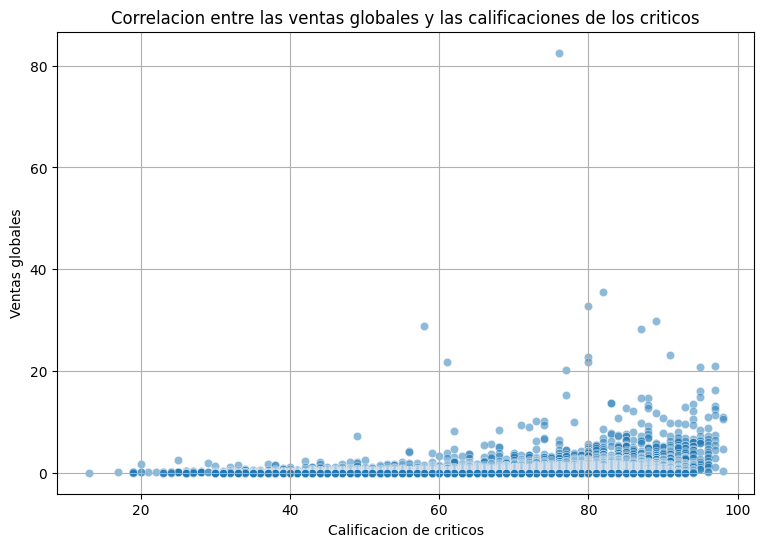

In [ ]:
plt.figure(figsize = (9, 6))

sns.scatterplot(data = df, x = "Critic_Score", y = "Global_Sales", alpha = 0.5)

plt.title("Correlacion entre las ventas globales y las calificaciones de los criticos")
plt.xlabel("Calificacion de criticos")
plt.ylabel("Ventas globales")

plt.grid(True)

plt.show()

Claramente los datos no estan preparados para hacer una correlacion.

## ¿Las ventas varian segun la calificiacion de edades?

Las calificaciones de edades restringen el acceso a determinados juegos segun la edad del individuo por lo que una calsifiacion sin restricciones como "E" (Everyone) deberia vender mas que alguna que limite de cierta manera la edad de un colectivo en especial por ejemplo "T" (Teen).


Variables:
*   Rating: Columna que indica la calificacion por edades de cada juego.
*   Global_Sales: Columna que indica las ventas globales de cada juego.




In [ ]:
# Agrupo los datos por genero y sumo las ventas globales para cada uno:
datos_rating_ventas = df.groupby("Rating")["Global_Sales"].sum().reset_index().sort_values(by = "Global_Sales", ascending = False)

print(datos_rating_ventas)

  Rating  Global_Sales
1      E       2436.90
7      T       1494.40
5      M       1473.84
2   E10+        655.81
4    K-A          4.33
0     AO          1.95
3     EC          1.78
6     RP          0.08


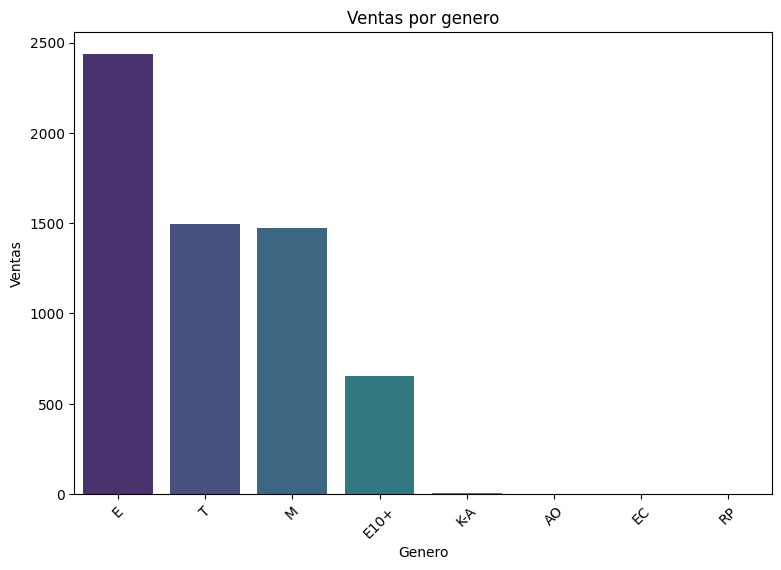

In [ ]:
# Creo un agrafica de barras comparando los datos:
plt.figure(figsize = (9, 6))

sns.barplot(data = datos_rating_ventas, x = "Rating", y = "Global_Sales", palette = "viridis")
plt.title("Ventas por Rating")
plt.xlabel("Genero")
plt.ylabel("Ventas")

# Giro los generos para mejor legibilidad:
plt.xticks(rotation = 45)

plt.show()

Podemos ver que la categoria "E" (Everyone) en efecto vendio mas que la categoria "T" (Teen). Esto puede ser porque lo que entran en la categoria "T" tambien pueden acceder a la "E" mientras que los que solo entran en esta no pueden acceder a "T".

Se recomienda adaptar el juego para el rating E asi se abarca la mayor cantidad de publico.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Comvierto la columna user score con los datos "tbd" en NaN:
df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce')

# Selleciono las caracterisiticas y las etiquetas del conjunto de datos:
features = df[["Critic_Score", "User_Score", "NA_Sales"]]
labels = df["Global_Sales"]

# Divido los datos para entrenamiento(train) y pruebas(test):
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Utilizo la feature selection backward selection para seleccionar las caracteristicas más importantes:
sfs_backward = SFS(estimator=LinearRegression(),
                                         k_features = 1,
                                         forward=False,
                                         floating=False,
                                         scoring="r2",
                                         cv=0)

sfs_backward.fit(X_train, y_train)
selected_feature_backward =  sfs_backward.k_feature_names_
print("Caracteristicas seleccionada: ", selected_feature_backward)

# Entreno el modelo de Regresión Lineal:
model = LinearRegression()
model.fit(X_train, y_train)

# Prediccion y evaluacion del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mse
r2 = r2_score(y_test, predictions)
r2

ValueError: ignored